<a href="https://colab.research.google.com/github/Brian-Samson01/ALX_Simple_Quiz/blob/main/F19_2122_2022_BRIAN_SAMSON_NJUNU_MWANGI_ADJUSTMENT_FOURTHTERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **F19/2122/2022_BRIAN SAMSON NJUNU MWANGI**

# **FIXED NETWORK ADJUSTMENT**

In [3]:
import pandas as pd

# Mount Google Drive if your file is there
# from google.colab import drive
# drive.mount('/content/drive')

# Replace with your actual file path
file_path = '/content/fouth_term.xlsx'

# Load Excel file
xls = pd.ExcelFile(file_path)

# Load sheets
directions_df = xls.parse('directions')
distances_df = xls.parse('distances')
coordinates_df = xls.parse('coordinates')

# Preview
print("Directions:")
print(directions_df.head())
print("\nDistances:")
print(distances_df.head())
print("\nCoordinates:")
print(coordinates_df.head())


Directions:
   STAND  TARGET  DIRECTION (gon)  DIRECTION (rad)
0      1       2          0.00000              NaN
1      1      11          3.92813              NaN
2      1      12         26.65768              NaN
3      1       3         28.14169              NaN
4      1       7         29.46106              NaN

Distances:
   STAND  TARGET  DISTANCE
0      1       2   14.5967
1      1       3   49.2302
2      1       4   69.9973
3      2       3   36.5734
4      2       4   59.2302

Coordinates:
   POINT    X (m)    Y (m)
0      1  100.103  100.011
1      2  111.601  109.003
2      3  122.181  144.013
3      4  116.692  168.014
4      5   87.661  134.199


# **Converion into radians**

In [4]:
import numpy as np

# Convert direction from gons to radians (1 gon = π/200 rad)
directions_df['DIRECTION (rad)'] = directions_df['DIRECTION (gon)'] * (np.pi / 200)

# Confirm conversion
print(directions_df[['STAND', 'TARGET', 'DIRECTION (gon)', 'DIRECTION (rad)']].head())


   STAND  TARGET  DIRECTION (gon)  DIRECTION (rad)
0      1       2          0.00000         0.000000
1      1      11          3.92813         0.061703
2      1      12         26.65768         0.418738
3      1       3         28.14169         0.442049
4      1       7         29.46106         0.462773


In [5]:
# Get all unique point IDs from coordinates
unique_points = sorted(coordinates_df['POINT'].unique())
point_id_map = {old_id: new_id for new_id, old_id in enumerate(unique_points, start=1)}

# Apply this map to all dataframes
coordinates_df['POINT'] = coordinates_df['POINT'].map(point_id_map)
directions_df['STAND'] = directions_df['STAND'].map(point_id_map)
directions_df['TARGET'] = directions_df['TARGET'].map(point_id_map)
distances_df['STAND'] = distances_df['STAND'].map(point_id_map)
distances_df['TARGET'] = distances_df['TARGET'].map(point_id_map)

# Also print the renumbering map for verification
print("Renumbering Map (Old ID → New ID):")
print(point_id_map)

# Preview updated data
print("\nUpdated Coordinates:")
print(coordinates_df.head())


Renumbering Map (Old ID → New ID):
{np.int64(1): 1, np.int64(2): 2, np.int64(3): 3, np.int64(4): 4, np.int64(5): 5, np.int64(6): 6, np.int64(7): 7, np.int64(8): 8, np.int64(9): 9, np.int64(10): 10, np.int64(11): 11, np.int64(12): 12}

Updated Coordinates:
   POINT    X (m)    Y (m)
0      1  100.103  100.011
1      2  111.601  109.003
2      3  122.181  144.013
3      4  116.692  168.014
4      5   87.661  134.199


**Design and observation matrices for Distances**

In [6]:
import numpy as np

# Convert coordinates into a dictionary for easy access
coord_dict = coordinates_df.set_index('POINT')[['X (m)', 'Y (m)']].to_dict('index')
num_points = len(coord_dict)
num_obs = len(distances_df)

# Initialize A matrix and l vector for distances
A_dist = np.zeros((num_obs, 2 * num_points))  # 2 unknowns per point (X and Y)
l_dist = np.zeros((num_obs, 1))

for idx, row in distances_df.iterrows():
    i = int(row['STAND'])
    j = int(row['TARGET'])

    xi, yi = coord_dict[i]['X (m)'], coord_dict[i]['Y (m)']
    xj, yj = coord_dict[j]['X (m)'], coord_dict[j]['Y (m)']
    dij_obs = row['DISTANCE']

    dx = xj - xi
    dy = yj - yi
    dist_calc = np.sqrt(dx**2 + dy**2)

    # Fill l vector
    l_dist[idx] = dij_obs - dist_calc

    # Partial derivatives
    d_dx = dx / dist_calc
    d_dy = dy / dist_calc

    # Fill design matrix A
    A_dist[idx, 2*(i-1)]   = -d_dx  # d/dX_i
    A_dist[idx, 2*(i-1)+1] = -d_dy  # d/dY_i
    A_dist[idx, 2*(j-1)]   = d_dx   # d/dX_j
    A_dist[idx, 2*(j-1)+1] = d_dy   # d/dY_j

print("Design matrix A for distances (shape):", A_dist.shape)
print(A_dist)
print("Reduced observation vector l for distances (shape):", l_dist.shape)
print(l_dist)


Design matrix A for distances (shape): (6, 24)
[[-0.78771891 -0.61603483  0.78771891  0.61603483  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [-0.44846442 -0.89380068  0.          0.          0.44846442  0.89380068
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [-0.23699532 -0.97151079  0.          0.          0.          0.
   0.23699532  0.97151079  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.         -0.2892788  -0.95724489  0.2892788   0.95724489
   0.          0.          0.          0.          0

**Design and observation matrices for Directions**

In [7]:
num_obs_dir = len(directions_df)

A_dir = np.zeros((num_obs_dir, 2 * num_points))
l_dir = np.zeros((num_obs_dir, 1))

for idx, row in directions_df.iterrows():
    i = int(row['STAND'])
    j = int(row['TARGET'])

    xi, yi = coord_dict[i]['X (m)'], coord_dict[i]['Y (m)']
    xj, yj = coord_dict[j]['X (m)'], coord_dict[j]['Y (m)']
    theta_obs = row['DIRECTION (rad)']

    dx = xj - xi
    dy = yj - yi
    r2 = dx**2 + dy**2
    theta_calc = np.arctan2(dy, dx)

    # Compute angle difference with correct wrap
    delta_theta = theta_obs - theta_calc
    delta_theta = np.arctan2(np.sin(delta_theta), np.cos(delta_theta))  # Wrap to [-π, π]

    # Fill l vector
    l_dir[idx] = delta_theta

    # Partial derivatives
    A_dir[idx, 2*(i-1)]   = dy / r2       # dθ/dX_i
    A_dir[idx, 2*(i-1)+1] = -dx / r2      # dθ/dY_i
    A_dir[idx, 2*(j-1)]   = -dy / r2      # dθ/dX_j
    A_dir[idx, 2*(j-1)+1] = dx / r2       # dθ/dY_j

print("Design matrix A for directions (shape):", A_dir.shape)
print(A_dir)
print("Reduced observation vector l for directions (shape):", l_dir.shape)
print(l_dir)


Design matrix A for directions (shape): (49, 24)
[[ 0.04220406 -0.053966   -0.04220406 ...  0.          0.
   0.        ]
 [ 0.01088989 -0.01228177  0.         ...  0.01228177  0.
   0.        ]
 [ 0.01236557 -0.00656962  0.         ...  0.         -0.01236557
   0.00656962]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.02085827 ...  0.          0.
   0.        ]]
Reduced observation vector l for directions (shape): (49, 1)
[[-0.663699  ]
 [-0.66369896]
 [-0.66369824]
 [-0.66370113]
 [-0.66369926]
 [-0.6636952 ]
 [-0.66370019]
 [-0.72974656]
 [-0.66369913]
 [-0.66370242]
 [-0.66370086]
 [ 2.47789366]
 [ 2.47788315]
 [ 2.47789296]
 [ 2.47789321]
 [ 2.47788524]
 [ 2.47788855]
 [ 2.4778924 ]
 [ 2.47788712]
 [ 2.47787912]
 [ 2.47788824]
 [ 2.48768602]
 [ 2.03584289]
 [ 2.03585229]
 [ 2.03585278]
 [ 2.03584389]
 [ 2.03583748]
 [ 2.03584163]
 [ 2.03584256]
 [ 

In [8]:
# Combine design matrices and observation vectors
A = np.vstack((A_dist, A_dir))
l = np.vstack((l_dist, l_dir))

print("Combined design matrix A shape:", A.shape)
print("Combined observation vector l shape:", l.shape)


Combined design matrix A shape: (55, 24)
Combined observation vector l shape: (55, 1)


**Weight matrix**

In [9]:
# Standard deviations
sigma_dist = 0.0005  # meters
sigma_dir_rad = 4.84814e-6  # radians

# Weight: inverse of variance = 1 / σ²
P_dist = np.eye(len(l_dist)) * (1 / sigma_dist**2)
P_dir = np.eye(len(l_dir)) * (1 / sigma_dir_rad**2)

# Combine into block-diagonal weight matrix
P = np.block([
    [P_dist,               np.zeros((len(l_dist), len(l_dir)))],
    [np.zeros((len(l_dir), len(l_dist))), P_dir]
])

print("Weight matrix P shape:", P.shape)
print(P)


Weight matrix P shape: (55, 55)
[[4.00000000e+06 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.00000000e+06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.00000000e+06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.25451143e+10
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.25451143e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.25451143e+10]]


In [10]:
# Datum (fixed) points: 1, 4, 11 → remapped to sequential IDs earlier
fixed_points = [point_id_map[i] for i in [1, 4, 11]]

# Identify indices of unknowns to keep (not fixed)
all_indices = set(range(2 * num_points))  # Each point has X and Y → 2*num_points
fixed_indices = set()
for p in fixed_points:
    fixed_indices.update([2*(p-1), 2*(p-1)+1])  # X and Y indices for point p

free_indices = sorted(all_indices - fixed_indices)

# Reduce matrices
A_red = A[:, free_indices]


In [11]:
# Normal equations
N = A_red.T @ P @ A_red
u = A_red.T @ P @ l

# Solve for corrections
x_hat = np.linalg.solve(N, u)

# Compute residuals
v = A_red @ x_hat - l

# A posteriori variance factor
dof = len(l) - len(x_hat)
sigma0_squared = (v.T @ P @ v) / dof
sigma0 = np.sqrt(sigma0_squared.item())

print("A posteriori variance factor (σ₀²):", sigma0_squared.item())
print("Standard deviation of unit weight (σ₀):", sigma0)


A posteriori variance factor (σ₀²): 73214531729.06134
Standard deviation of unit weight (σ₀): 270581.83924473077


**Adjusted Coordinates (fixed network)**

In [12]:
# Initialize full coordinate vector (X0) using original values
X0 = np.zeros((2 * num_points, 1))

for point, coords in coord_dict.items():
    idx = point - 1
    X0[2*idx] = coords['X (m)']
    X0[2*idx + 1] = coords['Y (m)']

# Create full correction vector (x_full), insert estimates in free positions
x_full = np.zeros_like(X0)
for idx, free_idx in enumerate(free_indices):
    x_full[free_idx] = x_hat[idx]

# Final adjusted coordinates
X_adj = X0 + x_full

# Convert to DataFrame for easier viewing
adjusted_coords = []
for i in range(num_points):
    point_id = i + 1
    X = X_adj[2*i][0]
    Y = X_adj[2*i + 1][0]
    adjusted_coords.append((point_id, X, Y))

print("Adjusted Coordinates:")
adjusted_df = pd.DataFrame(adjusted_coords, columns=["Point", "X (m)", "Y (m)"])
print(adjusted_df.round(4))


Adjusted Coordinates:
    Point     X (m)     Y (m)
0       1  100.1030  100.0110
1       2  172.2628  141.0698
2       3  135.4094  144.4579
3       4  116.6920  168.0140
4       5  123.9525   79.4058
5       6  173.7973   75.7842
6       7  113.1551  197.8098
7       8  135.2691  -73.2624
8       9  287.3266   85.7195
9      10  209.0060  189.1273
10     11  145.6870  140.4290
11     12  114.2307  201.2158


**Standard Deviations**

In [13]:
# Cofactor matrix of the free unknowns
Q_xx = np.linalg.inv(N)
Σ_xx = sigma0_squared.item() * Q_xx  # Variance-covariance matrix

# Initialize full std deviation vector (X and Y for each point)
std_dev_vector = np.zeros((2 * num_points,))

# Assign std deviations from Σ_xx to free unknowns
for idx, free_idx in enumerate(free_indices):
    std_dev_vector[free_idx] = np.sqrt(Σ_xx[idx, idx])

# Assemble with point numbers
std_dev_coords = []
for i in range(num_points):
    point_id = i + 1
    std_x = std_dev_vector[2*i]
    std_y = std_dev_vector[2*i + 1]
    std_dev_coords.append((point_id, std_x, std_y))

print("Standard Deviations:")
std_dev_df = pd.DataFrame(std_dev_coords, columns=["Point", "σ_X (m)", "σ_Y (m)"])
print(std_dev_df.round(6))


Standard Deviations:
    Point    σ_X (m)    σ_Y (m)
0       1   0.000000   0.000000
1       2  20.169376  17.550542
2       3  16.987023  22.737507
3       4   0.000000   0.000000
4       5  24.023273  29.241525
5       6  31.747723  19.731211
6       7  26.008416  21.055630
7       8  13.971655  49.127011
8       9  47.514963  33.683514
9      10  48.824525  34.366789
10     11   0.000000   0.000000
11     12  32.086886  22.432582


**Error Ellipses**

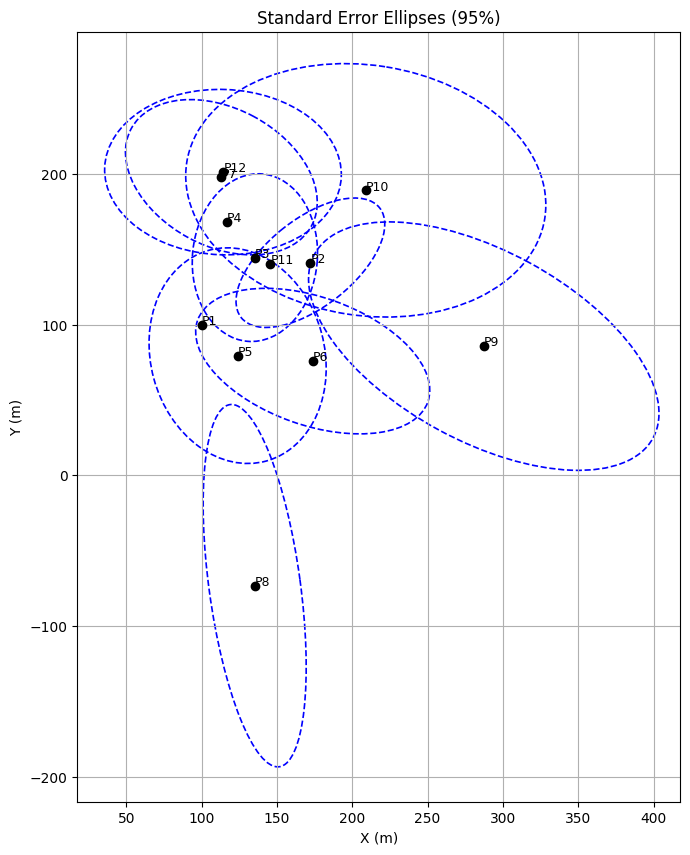

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Build full covariance matrix (include zeros for fixed)
full_cov = np.zeros((2*num_points, 2*num_points))
for i, row in enumerate(free_indices):
    for j, col in enumerate(free_indices):
        full_cov[row, col] = Σ_xx[i, j]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')

# Plot points and ellipses
for i in range(num_points):
    X = X_adj[2*i][0]
    Y = X_adj[2*i+1][0]

    # Plot point
    ax.plot(X, Y, 'ko')
    ax.text(X + 0.2, Y + 0.2, f"P{i+1}", fontsize=9)

    # 2x2 covariance submatrix
    cov = full_cov[2*i:2*i+2, 2*i:2*i+2]

    if np.all(cov == 0):
        continue  # Skip fixed points (zero covariance)

    # Eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals = eigvals[order]
    eigvecs = eigvecs[:, order]

    # Axis lengths (scale factor for 95% confidence ellipse ~2.4477)
    scale = 2.4477
    width, height = 2 * scale * np.sqrt(eigvals)
    angle = np.degrees(np.arctan2(*eigvecs[:,0][::-1]))

    ellipse = Ellipse(xy=(X, Y), width=width, height=height, angle=angle,
                      edgecolor='blue', fc='none', lw=1.2, linestyle='--')
    ax.add_patch(ellipse)

ax.set_title("Standard Error Ellipses (95%)")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
plt.grid(True)
plt.show()


**Global Model Test**

In [15]:
from scipy.stats import chi2
import numpy as np
import pandas as pd

# Step 0: Assume you have already loaded matrices A, l, P, and point_id_map

# Step 1: Fixed network adjustment
N = A.T @ P @ A
u = A.T @ P @ l
x_hat = np.linalg.solve(N, u)

v = A @ x_hat - l
dof = len(l) - len(x_hat)  # degrees of freedom
sigma0_sq = (v.T @ P @ v) / dof
sigma0 = np.sqrt(sigma0_sq.item())

print("✅ Fixed network adjustment complete")
print(f"Posterior variance σ₀²: {sigma0_sq.item():.6f}")
print(f"Standard deviation of unit weight σ₀: {sigma0:.6f}")
print(f"Degrees of freedom (ν): {dof}")

# Step 2: Global model test
alpha = 0.05
lower_bound = chi2.ppf(alpha / 2, dof)
upper_bound = chi2.ppf(1 - alpha / 2, dof)
T_scaled = sigma0_sq.item() * dof

print(f"\n--- Global Model Test ---")
print(f"Test statistic T × ν: {T_scaled:.3f}")
print(f"Chi-square bounds (95%): [{lower_bound:.3f}, {upper_bound:.3f}]")

# Step 3: Decision
if lower_bound <= T_scaled <= upper_bound:
    print("✅ Global model test PASSED: model is consistent with observations.")
else:
    print("❌ Global model test FAILED: model is not consistent with assumed errors.")


✅ Fixed network adjustment complete
Posterior variance σ₀²: 54196770442.679420
Standard deviation of unit weight σ₀: 232801.998365
Degrees of freedom (ν): 31

--- Global Model Test ---
Test statistic T × ν: 1680099883723.062
Chi-square bounds (95%): [17.539, 48.232]
❌ Global model test FAILED: model is not consistent with assumed errors.


## **# FREE NETWORK ADJUSTMENT**

In [16]:
# A, l, and P are ready from earlier


In [17]:
N = A.T @ P @ A
u = A.T @ P @ l


In [18]:
# Number of unknowns (2 per point: X, Y)
n_unknowns = A.shape[1]

# G matrix: [Translation in X, Translation in Y, Rotation]
G = np.zeros((n_unknowns, 3))

for i in range(num_points):
    G[2*i, 0] = 1  # dX translation
    G[2*i+1, 1] = 1  # dY translation
    G[2*i, 2] = -X0[2*i+1][0]  # rotation part for X = -Y
    G[2*i+1, 2] = X0[2*i][0]   # rotation part for Y = +X


In [19]:
# Generalized inverse of N
N_inv = np.linalg.pinv(N)

# Initial (floating) solution
x_free = N_inv @ u

# Residuals and a posteriori variance
v = A @ x_free - l
dof = len(l) - (n_unknowns - 3)  # account for 3 rank deficiency
sigma0_squared = (v.T @ P @ v) / dof
sigma0 = np.sqrt(sigma0_squared.item())

print("A posteriori variance factor (σ₀²):", sigma0_squared.item())
print("Standard deviation of unit weight (σ₀):", sigma0)


A posteriori variance factor (σ₀²): 49414702462.442986
Standard deviation of unit weight (σ₀): 222294.1800012834


In [20]:
# S-Transformation
GtNinv = G.T @ N_inv
S = np.eye(n_unknowns) - N_inv @ G @ np.linalg.inv(GtNinv @ G) @ GtNinv

# Constrained solution
x_constrained = S @ x_free


**Adjusted coordinates (free network)**

In [21]:
# Apply corrections to original coordinates
X_adj = X0 + x_constrained

# Convert to DataFrame
adjusted_coords = []
for i in range(num_points):
    point_id = i + 1
    X = X_adj[2*i][0]
    Y = X_adj[2*i + 1][0]
    adjusted_coords.append((point_id, X, Y))

adjusted_df = pd.DataFrame(adjusted_coords, columns=["Point", "X (m)", "Y (m)"])
print("Adjusted Coordinates:")
print(adjusted_df.round(4))


Adjusted Coordinates:
    Point     X (m)     Y (m)
0       1   94.1856   88.3155
1       2  141.5198  124.8669
2       3   94.5792  166.0440
3       4   47.3689  172.8160
4       5   83.8067   99.7213
5       6  134.3536   74.8427
6       7   66.6082  191.7094
7       8  119.8480  -47.0060
8       9  242.3275   79.8670
9      10  182.7700  173.7982
10     11  131.9193  204.8101
11     12   67.7551  199.7929


**Standard deviations**

In [22]:
# Covariance matrix of adjusted unknowns
Q_xx = S @ N_inv
Σ_xx = sigma0_squared.item() * Q_xx

# Extract standard deviations
std_dev_vector = np.sqrt(np.diag(Σ_xx))

std_dev_coords = []
for i in range(num_points):
    point_id = i + 1
    std_x = std_dev_vector[2*i]
    std_y = std_dev_vector[2*i + 1]
    std_dev_coords.append((point_id, std_x, std_y))

std_dev_df = pd.DataFrame(std_dev_coords, columns=["Point", "σ_X (m)", "σ_Y (m)"])
print("Standard Deviations:")
print(std_dev_df.round(6))


Standard Deviations:
    Point    σ_X (m)    σ_Y (m)
0       1  21.948742  28.211560
1       2  15.144891  21.905342
2       3  12.948709  24.688607
3       4  15.037225  41.515400
4       5  33.823431  22.453001
5       6  38.513106  25.808582
6       7  22.981955  38.020226
7       8  20.624059  53.975754
8       9  37.082682  39.463721
9      10  45.472089  28.662525
10     11  48.284795  27.262862
11     12  29.510459  39.555893


**Error Ellipses**

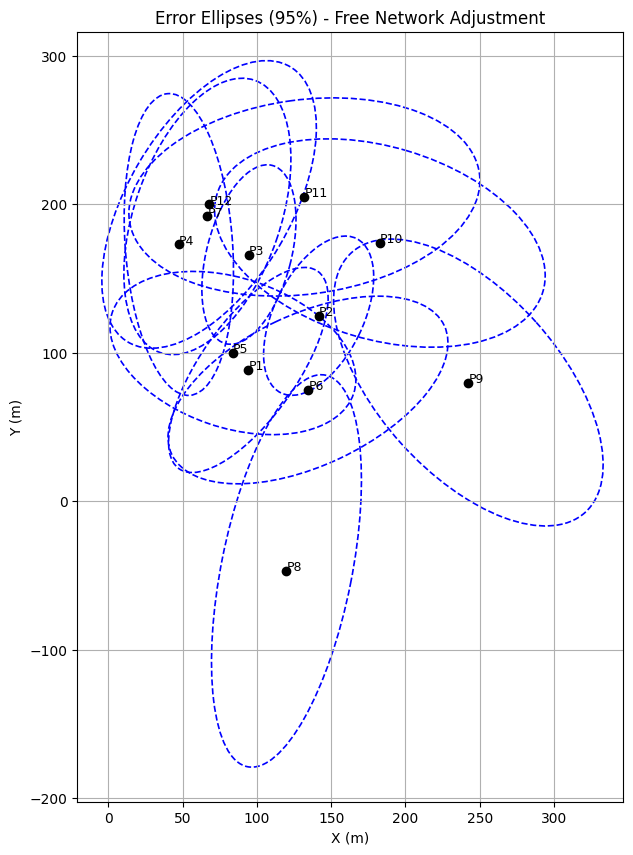

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')

for i in range(num_points):
    X = X_adj[2*i][0]
    Y = X_adj[2*i+1][0]

    # Plot point
    ax.plot(X, Y, 'ko')
    ax.text(X + 0.2, Y + 0.2, f"P{i+1}", fontsize=9)

    # Covariance submatrix
    cov = Σ_xx[2*i:2*i+2, 2*i:2*i+2]

    if np.all(cov == 0):
        continue  # Skip undefined covariances

    # Eigenvalues for ellipse axes
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals = eigvals[order]
    eigvecs = eigvecs[:, order]

    # Axis lengths (95% confidence)
    scale = 2.4477
    width, height = 2 * scale * np.sqrt(eigvals)
    angle = np.degrees(np.arctan2(*eigvecs[:,0][::-1]))

    ellipse = Ellipse(xy=(X, Y), width=width, height=height, angle=angle,
                      edgecolor='blue', fc='none', lw=1.2, linestyle='--')
    ax.add_patch(ellipse)

ax.set_title("Error Ellipses (95%) - Free Network Adjustment")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
plt.grid(True)
plt.show()


**Global Model Test**

In [24]:
from scipy.stats import chi2

# Step 1: Compute degrees of freedom (redundancy)
n_obs = len(l)
r = n_obs - (A.shape[1] - 3)  # for free network, subtract 3 for rank deficiency

# Step 2: Compute chi-square test statistic
chi_square_calc = (v.T @ P @ v) / 1  # Divide by σ₀² (1 assumed a priori)
chi_square_val = chi_square_calc.item()

# Step 3: Define significance level (e.g., α = 0.05 for 95% confidence)
alpha = 0.05

# Step 4: Compute critical chi-square bounds
chi2_lower = chi2.ppf(alpha / 2, r)
chi2_upper = chi2.ppf(1 - alpha / 2, r)

# Step 5: Decision
print(f"\n--- Global Model Test ---")
print(f"Redundancy (r): {r}")
print(f"Calculated χ²: {chi_square_val:.4f}")
print(f"Critical χ² bounds (α = {alpha}): [{chi2_lower:.4f}, {chi2_upper:.4f}]")

if chi2_lower <= chi_square_val <= chi2_upper:
    print("✅ Result: H₀ not rejected — stochastic model is acceptable.")
else:
    print("❌ Result: H₀ rejected — assumed variances may be incorrect.")



--- Global Model Test ---
Redundancy (r): 34
Calculated χ²: 1680099883723.0615
Critical χ² bounds (α = 0.05): [19.8063, 51.9660]
❌ Result: H₀ rejected — assumed variances may be incorrect.
